In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numba import njit, jit

In [2]:
df = pd.read_csv("news_articles_small.csv")
# df = pd.read_csv("news_articles_large.csv")

print(df.head())

   News_ID                                            article
0        0  The Supreme Court in Johnnesberg on Friday pos...
1        1  The IG Metall union has decided not to spread ...
2        2  Malaysia said Friday it had no plans to overre...
3        3  South Korea is redoubling its efforts behind K...
4        4  The Philippine subsidiary of US telecommunicat...


# Jaccard similarity

In [3]:
shingles = 1
shingles_dict = dict()

In [4]:
def apply_shingles(input):
    s = set()
    l = input.split(' ')
    for ind in range((len(l) - shingles + 1)):
        word = ' '.join(l[ind:ind+shingles])
        if word not in shingles_dict:
            shingles_dict[word] = len(shingles_dict)
        s.add(shingles_dict[word])
    return s
        
df["shingles"] = df["article"].apply(apply_shingles)
print(df.head())

   News_ID                                            article  \
0        0  The Supreme Court in Johnnesberg on Friday pos...   
1        1  The IG Metall union has decided not to spread ...   
2        2  Malaysia said Friday it had no plans to overre...   
3        3  South Korea is redoubling its efforts behind K...   
4        4  The Philippine subsidiary of US telecommunicat...   

                                            shingles  
0  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
1  {0, 3, 5, 11, 14, 15, 19, 21, 25, 28, 35, 42, ...  
2  {0, 512, 513, 3, 514, 5, 6, 515, 516, 517, 11,...  
3  {1, 2, 3, 5, 518, 519, 520, 521, 522, 523, 524...  
4  {0, 3, 5, 6, 11, 14, 528, 19, 26, 28, 35, 42, ...  


In [5]:
def similarity(a, b):
    return (len(a & b) / len(a | b))

In [6]:
similarities = list()
for ind_i, i in enumerate(df["shingles"]):
    for ind_j, j in enumerate(df["shingles"]):
        if ind_i != ind_j:
            similarities.append(similarity(i, j))

hist = np.histogram(similarities, bins=10, range=(0, 1))

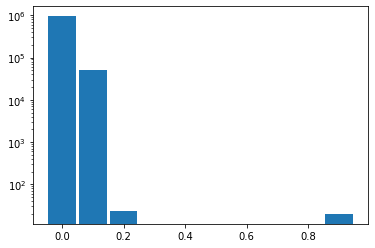

In [38]:
fig, ax = plt.subplots()
ax.bar(hist[1][:-1], hist[0], width=0.09)
ax.set_yscale("log")
plt.show()